In [1]:
import pandas as pd
df = pd.read_csv('Bike2.csv', encoding='utf8', index_col=0)
df2 = df
list_dong = df2['동'].unique().tolist()
df2['동'] = df2['동'].map(lambda x: list_dong.index(x))
list_st = df2['대여소근처역'].unique().tolist()
df2['대여소근처역'] = df2['대여소근처역'].map(lambda x: list_st.index(x))
df2['대여일자'] = df2['대여일자'].astype(str)
df2['대여일자'] = df2['대여일자'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df2['대여일자'] = df2['대여일자'].astype(int)
df2.dtypes
dataset = df2.sample(n=100000)
dataset.shape

(100000, 17)

In [2]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (95000, 17)
Unseen Data For Predictions: (5000, 17)


In [3]:
data_unseen

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분),주말,요일,대여소근처역,소재지,동,산업종류,광고
0,20220620,2,2411,0,2,0,1,1,2,3,0,0,98,13,277,5,29
1,20220614,1,2742,0,1,3,1,1,1,3,0,1,35,0,86,0,2
2,20220604,0,109,1,1,2,1,3,3,3,1,5,93,5,106,4,29
3,20220612,2,2613,0,2,3,1,0,1,1,1,6,54,1,58,11,29
4,20220612,0,1231,0,1,3,1,1,1,1,1,6,40,1,105,7,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20220602,1,385,0,0,3,1,0,0,0,0,3,293,11,46,6,13
4996,20220618,2,1653,0,2,3,1,1,1,2,1,5,59,3,6,2,29
4997,20220601,2,240,0,2,4,1,0,0,2,0,2,163,2,111,0,29
4998,20220616,1,1072,0,2,3,1,2,2,2,0,3,10,7,279,5,29


In [4]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = '광고', session_id=123)

,Description,Value
0,session_id,123
1,Target,광고
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(95000, 17)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9727,0.0000,0.8219,0.9727,0.9726,0.9309,0.9309,0.1570
et,Extra Trees Classifier,0.9718,0.0000,0.7224,0.9713,0.9712,0.9284,0.9284,2.3700
nb,Naive Bayes,0.9714,0.0000,0.8795,0.9759,0.9717,0.9272,0.9274,0.2090
rf,Random Forest Classifier,0.9703,0.0000,0.6038,0.9687,0.9690,0.9243,0.9244,1.9740
gbc,Gradient Boosting Classifier,0.9450,0.0000,0.6767,0.9584,0.9497,0.8669,0.8685,154.7550
lda,Linear Discriminant Analysis,0.8829,0.0000,0.8224,0.9494,0.9109,0.7310,0.7373,1.0810
lr,Logistic Regression,0.7755,0.0000,0.0365,0.6013,0.6774,0.0000,0.0000,5.4200
ridge,Ridge Classifier,0.7755,0.0000,0.0365,0.6013,0.6774,0.0000,0.0000,0.1200
ada,Ada Boost Classifier,0.7755,0.0000,0.0365,0.6013,0.6774,0.0000,0.0000,2.2920
dummy,Dummy Classifier,0.7755,0.0000,0.0365,0.6013,0.6774,0.0000,0.0000,0.0410


In [9]:
best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [6]:
save_model(best_model, 'mymodel1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='광고',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                        

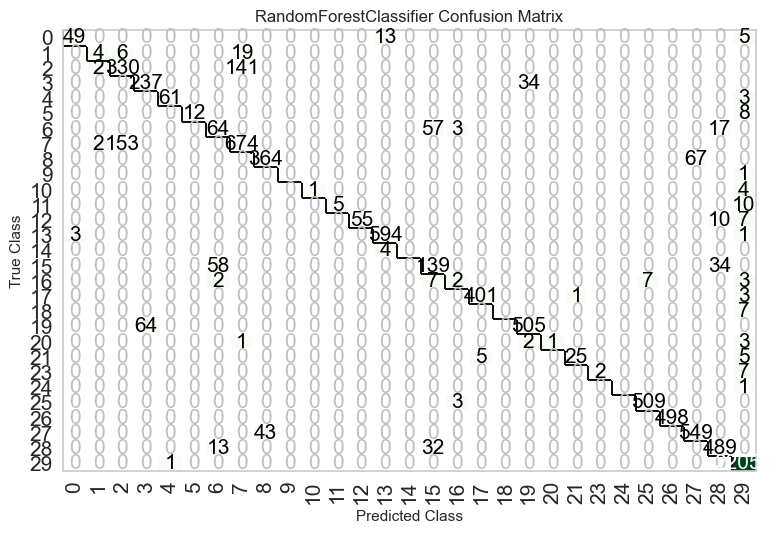

In [8]:
rf = create_model('rf')
plot_model(rf, plot = 'confusion_matrix')

In [13]:
create_model(estimator = 'dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9716,0.0000,0.8334,0.9720,0.9717,0.9280,0.9280
1,0.9698,0.0000,0.7924,0.9701,0.9699,0.9235,0.9235
2,0.9731,0.0000,0.8189,0.9725,0.9727,0.9318,0.9318
3,0.9704,0.0000,0.8269,0.9709,0.9705,0.9249,0.9249
4,0.9741,0.0000,0.8793,0.9739,0.9738,0.9345,0.9345
5,0.9749,0.0000,0.8221,0.9746,0.9746,0.9363,0.9363
6,0.9738,0.0000,0.8531,0.9733,0.9734,0.9337,0.9337
7,0.9717,0.0000,0.7942,0.9724,0.9720,0.9284,0.9285
8,0.9747,0.0000,0.7697,0.9742,0.9743,0.9360,0.9360


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [25]:
dt = create_model(estimator = 'dt')
plot_model(dt, save=True)

'AUC.png'

In [26]:
lr = create_model('lr')
plot_model(lr, save=True)

'AUC.png'

In [17]:
pip install shap

     -------------------------------------- 435.6/435.6 kB 3.0 MB/s eta 0:00:00
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
import matplotlib.pyplot as plt

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

%config InlineBackend.figure_format = 'retina'

In [27]:
import shap
interpret_model(dt, plot='summary', save=True)
interpret_model(dt, plot = 'reason', observation = 10, save=True)

In [31]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…